### Mineração de dados: Site Catho

Luiz Queiroz Barroso Junior

### 1. Bibliotecas utilizadas

In [ ]:
# Importando Bibliotecas

import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Raspagem do site "Catho"

In [ ]:
# Função para raspar dados do Catho e adicioná-las a uma lista
payload = {}
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36'}

job_list = []

error_count = 0

#Define a quantidade de páginas
for x in range  (30):
    pagina = x +  1

    try:

      url = 'https://www.catho.com.br/vagas/dados/?page={}'.format(pagina) #Monta a url

      response = requests.request("GET", url, headers=headers, data=payload) #Realiza o request da página

      if response.status_code != 200: #Verifica se ocorreu erros
          print(f"Página {x}: Erro ao acessar a URL: {url}. Código de resposta: {response.status_code}")
          break
      else:
          print(f'Página {x}: {url} obtida com sucesso.')

      soup = BeautifulSoup(response.text, 'html.parser')

      ul_vagas = soup.find('ul', {'class':'sc-cyRcrZ dcVhf gtm-class'})

      for i in range(len(ul_vagas.find_all('li'))):
          vaga = []
          li_vaga = ul_vagas.find_all('li', {'class': 'sc-kUdmhA WGjZc'})[i]

          # Título
          vaga.append(li_vaga.get('data-gtm-dimension-38'))

          # Faixa Salarial
          vaga.append(li_vaga.get('data-gtm-dimension-41'))

          # Data da Publicação =
          vaga.append(li_vaga.get('data-gtm-dimension-44'))

          # Empresa
          vaga.append(li_vaga.find('p', {'class': 'sc-fXSgeo wHOfK'}).text)

          #Local
          vaga.append(li_vaga.find('button', {'class': 'sc-jaXxmE bDKYQt'}).text)

          # Remuneração
          vaga.append(li_vaga.find('div', {'class': 'sc-guJBdh jLoNNh'}).text)

          # Descricao
          vaga.append(li_vaga.find('span', {'class': 'job-description'}).text)

          # Link
          vaga.append(li_vaga.get('data-gtm-page'))

          job_list.append(vaga)


    except:
        print(f"Página {x}: Erro ao processar o HTML.")
        error_count += 1
        pagina = x +  1
        continue

print(' ')
print('Log de Execução')
print('---')
print('Páginas:', pagina-1)
print('Paginas raspadas:', (pagina-1) - error_count)
print('Paginas ingnoradas com erro:', error_count)
print('---')


Página 0: https://www.catho.com.br/vagas/dados/?page=1 obtida com sucesso.
Página 1: https://www.catho.com.br/vagas/dados/?page=2 obtida com sucesso.
Página 2: https://www.catho.com.br/vagas/dados/?page=3 obtida com sucesso.
Página 2: Erro ao processar o HTML.
Página 3: https://www.catho.com.br/vagas/dados/?page=4 obtida com sucesso.
Página 4: https://www.catho.com.br/vagas/dados/?page=5 obtida com sucesso.
Página 4: Erro ao processar o HTML.
Página 5: https://www.catho.com.br/vagas/dados/?page=6 obtida com sucesso.
Página 6: https://www.catho.com.br/vagas/dados/?page=7 obtida com sucesso.
Página 7: https://www.catho.com.br/vagas/dados/?page=8 obtida com sucesso.
Página 7: Erro ao processar o HTML.
Página 8: https://www.catho.com.br/vagas/dados/?page=9 obtida com sucesso.
Página 8: Erro ao processar o HTML.
Página 9: https://www.catho.com.br/vagas/dados/?page=10 obtida com sucesso.
Página 10: https://www.catho.com.br/vagas/dados/?page=11 obtida com sucesso.
Página 10: Erro ao processar

### 3. Organização do Dataframe

In [ ]:
df = pd.DataFrame(job_list, columns=['Título', 'Faixa Salarial', 'Data Publicação', 'Empresa', 'Local', 'Remuneração Informada', 'Descrição', 'Link'])

In [ ]:
#Separando Cidade e UF
df['Cidade'] = [x.split(' - ')[0] for x in df['Local']]
df['UF'] = [x.split(' - ')[1][:2] for x in df['Local']]
df.drop('Local', axis=1, inplace=True)

#Organizando Títulos das vagas
df['Título'] = [x.split('Vaga de ')[1] if x != None else x for x in df['Título']]

#Formatando data
df['Data Publicação'] = pd.to_datetime(df['Data Publicação']).dt.strftime('%d-%m-%Y')

#Nível de Experiência
def extrair_nivel_experiencia(titulo):
    if titulo != None:
        padroes = {
            'Junior': r'\b(junior|jr)\b',
            'Sênior': r'\b(senior|sênior)\b',
            'Estagiario(a)': r'\b(estagiário|estagiario|estagiária|estagiaria|estágio|estagio)\b',
            'Pleno': r'\b(pleno)\b',
        }

        for nivel, padrao in padroes.items():
            if re.search(padrao, titulo, re.IGNORECASE):
                return nivel
    return 'Não especificado'

df['Nível de Experiência'] = df['Título'].apply(extrair_nivel_experiencia)

#Cargo
def extrair_cargo(titulo):
    if titulo != None:
        padroes = {
            'Analista': r'\b(analista|análise|analise)\b',
            'Cientista': r'\b(cientista)\b',
            'Engenheiro': r'\b(engenheiro)\b',
            'Estagiario(a)': r'\b(estagiário|estagiario|estagiária|estagiaria|estágio|estagio)\b',
        }

        for nivel, padrao in padroes.items():
            if re.search(padrao, titulo, re.IGNORECASE):
                return nivel
    return 'Não especificado'

df['Cargo'] = df['Título'].apply(extrair_cargo)
df

,Título,Faixa Salarial,Data Publicação,Empresa,Remuneração Informada,Descrição,Link,Cidade,UF,Nível de Experiência,Cargo
0,None,None,NaN,Pacha Inteligência Hidrica Ambiental Eireli.,"De R$ 1.001,00 a R$ 2.000,00",Você será responsável por: \n\nOperar estação...,None,Itupeva,SP,Não especificado,Não especificado
1,Cientista de Dados Sênior,"Até R$ 1.000,00",18-10-2023,Empresa ConfidencialPor que?,A Combinar,""" Responsável por garantir a precisão e a int...",https://www.catho.com.br/vagas/cientista-de-da...,São Paulo,SP,Sênior,Cientista
2,Estagiária/ Estagiário em Dados,"De R$ 7.001,00 a R$ 8.000,00",19-10-2023,VOTORAN,A Combinar,Somos uma empresa de materiais de construção ...,https://www.catho.com.br/vagas/estagiaria-esta...,Curitiba,PR,Estagiario(a),Estagiario(a)
3,Analista de Dados Senior,"De R$ 8.001,00 a R$ 9.000,00",19-10-2023,HARPIA SOLUÇÕES EM INFORMÁTICA,A Combinar,PRESENCIAL - PINDAMONHANGABA - SP.\n\nManipula...,https://www.catho.com.br/vagas/analista-de-dad...,Pindamonhangaba,SP,Sênior,Analista
4,Estagiário(a) - Dados,"De R$ 1.001,00 a R$ 2.000,00",16-10-2023,AUTOGLASS,A Combinar,Olá!! :DEstamos em busca de estagiário(a) par...,https://www.catho.com.br/vagas/estagiarioa-dad...,Vila Velha,ES,Estagiario(a),Estagiario(a)
...,...,...,...,...,...,...,...,...,...,...,...
315,Analista Financeiro Sr,"De R$ 4.001,00 a R$ 5.000,00",19-10-2023,KLAINTELL SOLUÇÕES EM SEGURANÇA,"De R$ 4.001,00 a R$ 5.000,00",Responsabilidades:\n•\tAnálise Financeira: \nE...,https://www.catho.com.br/vagas/analista-financ...,São Paulo,SP,Não especificado,Analista
316,Analista de Recrutamento e Seleção Pleno,"De R$ 3.001,00 a R$ 4.000,00",19-10-2023,Empresa ConfidencialPor que?,"De R$ 3.001,00 a R$ 4.000,00",O Analista de RH é o responsável pelo recrutam...,https://www.catho.com.br/vagas/analista-de-rec...,São Paulo,SP,Pleno,Analista
317,LÍDER DE CORTE E SOLDA\t\t\t\t\t\t\t\t\t\t\t\t...,"De R$ 3.001,00 a R$ 4.000,00",19-10-2023,Empresa ConfidencialPor que?,"De R$ 3.001,00 a R$ 4.000,00","Recrutar, treinar, motivar e liderar uma equip...",https://www.catho.com.br/vagas/lider-de-corte-...,Barueri,SP,Não especificado,Não especificado
318,ANALISTA LOGÍSTICO\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,"De R$ 3.001,00 a R$ 4.000,00",19-10-2023,Empresa ConfidencialPor que?,"De R$ 3.001,00 a R$ 4.000,00","Coordenar o transporte de mercadorias, garanti...",https://www.catho.com.br/vagas/analista-logist...,Barueri,SP,Não especificado,Analista


### 4. Analise dos dados obtidos

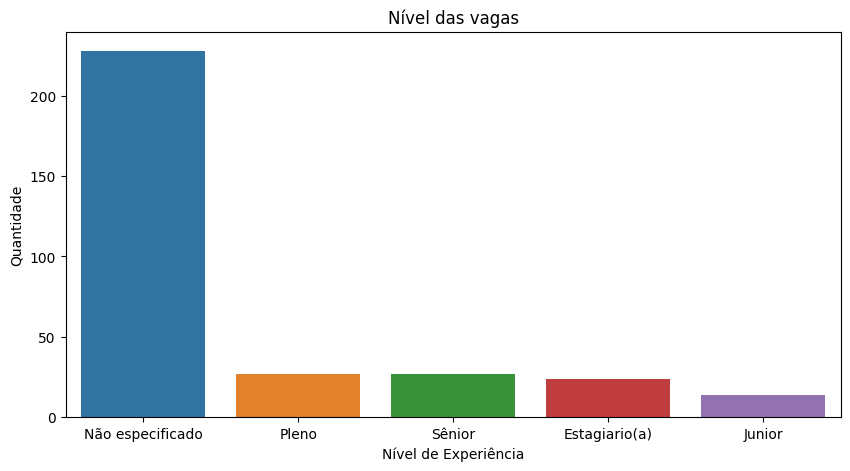

,Nível de Experiência,Quantidade
0,Não especificado,228
1,Pleno,27
2,Sênior,27
3,Estagiario(a),24
4,Junior,14


In [ ]:
#Nível de experiência exigida
nivel = df.groupby('Nível de Experiência').size().reset_index(name='Quantidade').sort_values(by = 'Quantidade', ascending = False).reset_index(drop = True)

plt.figure(figsize = (10, 5))
sns.barplot(data = nivel, y = 'Quantidade', x = 'Nível de Experiência').set(title = 'Nível das vagas')
sns.set_palette('coolwarm')
plt.show()

nivel

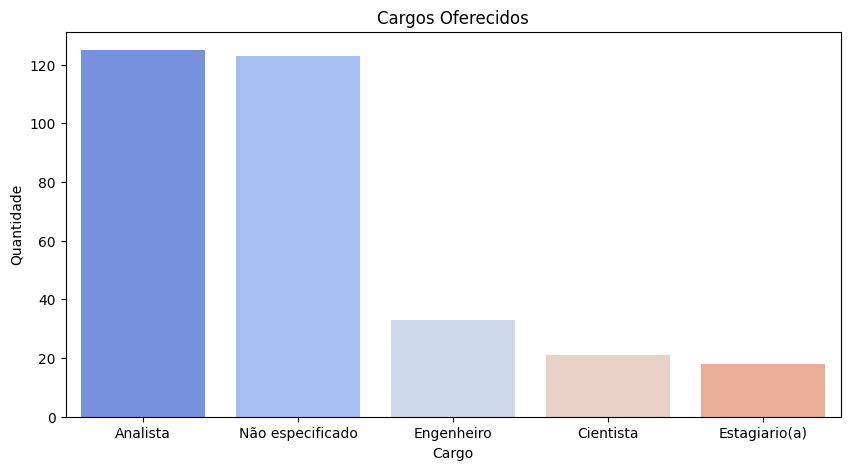

,Cargo,Quantidade
0,Analista,125
1,Não especificado,123
2,Engenheiro,33
3,Cientista,21
4,Estagiario(a),18


In [ ]:
#Cargo
cargo = df.groupby('Cargo').size().reset_index(name='Quantidade').sort_values(by = 'Quantidade', ascending = False).reset_index(drop = True)

plt.figure(figsize = (10, 5))
sns.barplot(data = cargo, y = 'Quantidade', x = 'Cargo').set(title = 'Cargos Oferecidos')
sns.set_palette('coolwarm')
plt.show()

cargo

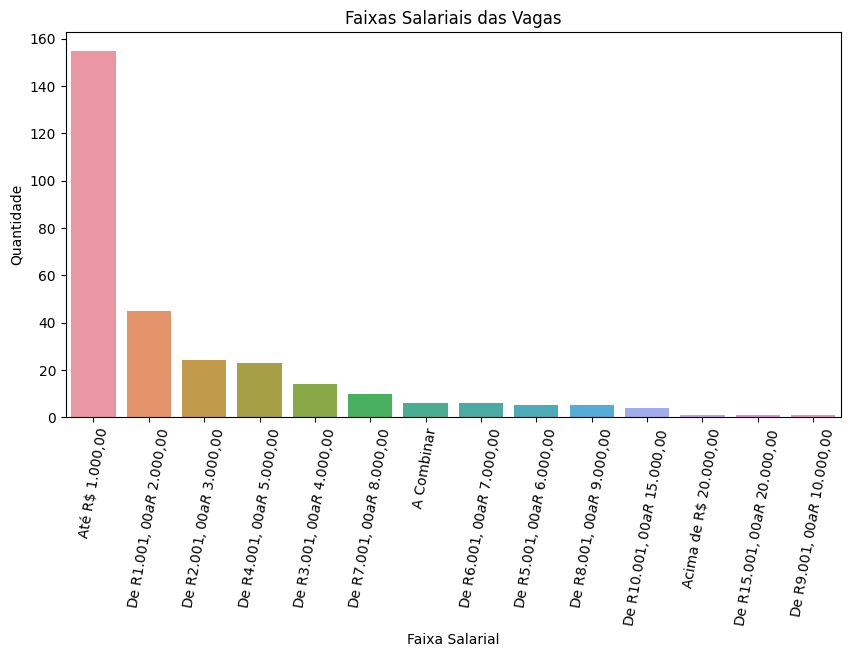

,Faixa Salarial,Quantidade
0,"Até R$ 1.000,00",155
1,"De R$ 1.001,00 a R$ 2.000,00",45
2,"De R$ 2.001,00 a R$ 3.000,00",24
3,"De R$ 4.001,00 a R$ 5.000,00",23
4,"De R$ 3.001,00 a R$ 4.000,00",14
5,"De R$ 7.001,00 a R$ 8.000,00",10
6,A Combinar,6
7,"De R$ 6.001,00 a R$ 7.000,00",6
8,"De R$ 5.001,00 a R$ 6.000,00",5
9,"De R$ 8.001,00 a R$ 9.000,00",5


In [ ]:
#Valor da Remuneração
remuneracao = df.groupby('Faixa Salarial').size().reset_index(name='Quantidade').sort_values(by = 'Quantidade', ascending = False).reset_index(drop = True)

plt.figure(figsize = (10, 5))
sns.barplot(data = remuneracao, y = 'Quantidade', x = 'Faixa Salarial').set(title = 'Faixas Salariais das Vagas')
sns.set_palette('coolwarm')
plt.xticks(rotation = 80)
plt.show()

remuneracao

In [ ]:
#Data das publicações
#datas = df.groupby('Data Publicação').size().reset_index(name='Quantidade').sort_values(by = 'Data Publicação', ascending = False).reset_index(drop = True)

#plt.figure(figsize = (10, 5))
#sns.barplot(data = datas, y = 'Quantidade', x = 'Data Publicação').set(title = 'Faixas Salariais das Vagas')
#sns.set_palette('coolwarm')
#plt.xticks(rotation = 80)
#plt.show()

#datas

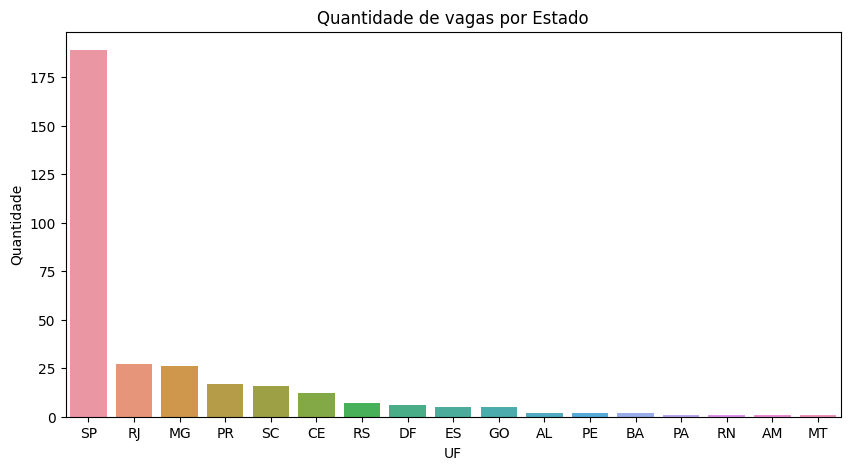

,UF,Quantidade
16,SP,189
12,RJ,27
7,MG,26
11,PR,17
15,SC,16
3,CE,12
14,RS,7
4,DF,6
5,ES,5
6,GO,5


In [ ]:
#Local das vagas
ufs = df.groupby('UF').size().reset_index(name='Quantidade').sort_values(by = 'Quantidade', ascending = False)

plt.figure(figsize = (10, 5))
sns.barplot(data = ufs, y = 'Quantidade', x = 'UF').set(title = 'Quantidade de vagas por Estado')
sns.set_palette('coolwarm')
plt.show()

ufs

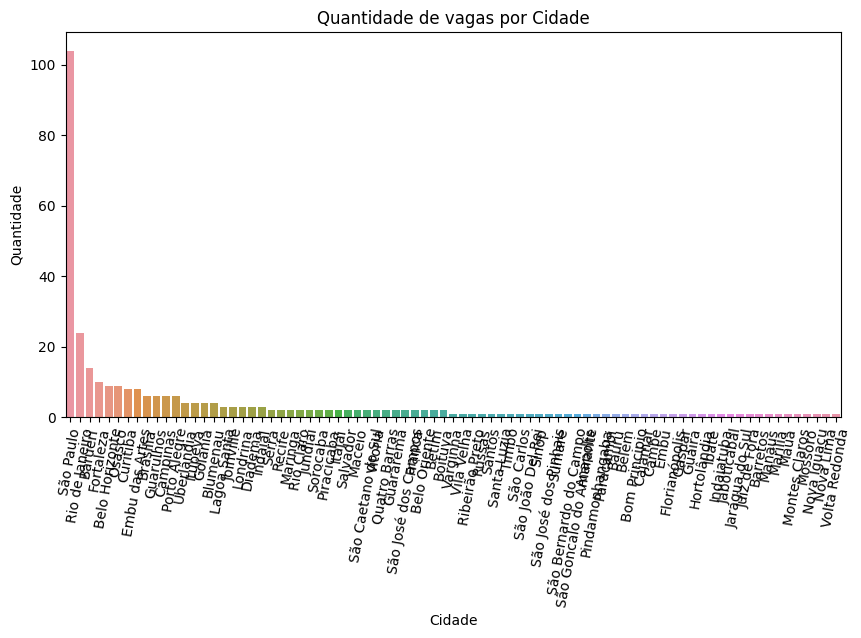

,Cidade,Quantidade
74,São Paulo,104
58,Rio de Janeiro,24
2,Barueri,14
20,Fortaleza,10
5,Belo Horizonte,9
...,...,...
45,Montes Claros,1
46,Mossoro,1
47,Nova Iguaçu,1
48,Nova Lima,1


In [ ]:
#Local das vagas
cidades = df.groupby('Cidade').size().reset_index(name='Quantidade').sort_values(by = 'Quantidade', ascending = False)

plt.figure(figsize = (10, 5))
sns.barplot(data = cidades, y = 'Quantidade', x = 'Cidade').set(title = 'Quantidade de vagas por Cidade')
sns.set_palette('coolwarm')
plt.xticks(rotation = 80)
plt.show()

cidades